IMPLEMENTATION RIDGE ET LASSO

In [211]:
#CHARGEMENT DES DONNEES

In [212]:
# charger les donnees appartir de panda
import pandas as pd
raw_data=pd.read_csv("C:/Users/GRIELLA/california_housing.csv")
raw_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [213]:
## recuperation des variables explicatives pour la regression
X_train=raw_data.iloc[:60,1:-3]
y_train=raw_data.iloc[:60,1:-2]
X_test=raw_data.iloc[:60,1:-3]
y_test=raw_data.iloc[:60,1:-2]


In [214]:
# DETERMINATION D'UNE REGRESSION CLASSIQUE

In [215]:
from sklearn import linear_model
import numpy as np

In [216]:
# #creation d'un modele de la regression lineaire
lr=linear_model.LinearRegression()

In [217]:
##faisons le fitting de ce model
lr.fit(X_train,y_train)

LinearRegression()

In [218]:
##recuperation de l'erreur de norme sur le jeude donnees
baseline_error=np.mean((lr.predict(X_test)-y_test)**2)

In [219]:
print(baseline_error)

1.4004794764740615e-05


In [220]:
#APPLICATION A UNE REGRESSION RIDGE

In [221]:
## faisons appel a un coefficient pour tester en faisant le test pour trouver un nombre optimal
n_alphas=200
alphas=np.logspace(-5, 5, n_alphas)

In [222]:
##test de la regression ridge avec differentes valeurs
from sklearn.linear_model import Ridge
ridge=linear_model.Ridge()

In [223]:
coefs=[]
errors=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.coef_)
errors.append([baseline_error, np.mean((ridge.predict(X_test)-y_test)**2)])


In [224]:
import matplotlib.pyplot as plt

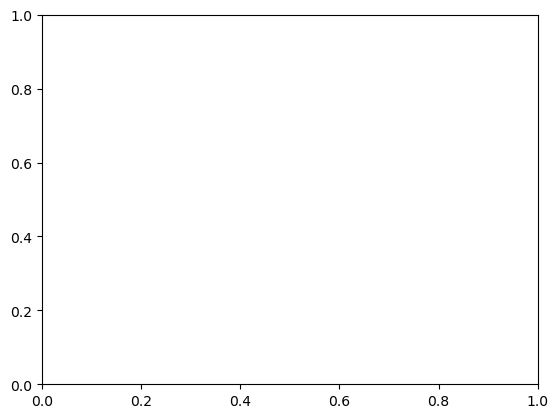

In [225]:
aX = plt.gca()

In [226]:
 aX.plot(alphas, coefs)
 aX.set_Xscale('log')
 plt.Xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

ValueError: x and y can be no greater than 2D, but have shapes (200,) and (200, 6, 5)

In [227]:
min(errors)

[1.4004794764740615e-05, 14.727452552848405]

In [228]:
#APPLICATION DU LASSO

In [229]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso=linear_model.Lasso(fit_intercept=False)

In [230]:
coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean(lasso.predict(X_test)-y_test**3)])

C:\Users\GRIELLA\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.722e+02, tolerance: 8.590e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\GRIELLA\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.695e+02, tolerance: 8.590e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\GRIELLA\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+02, to

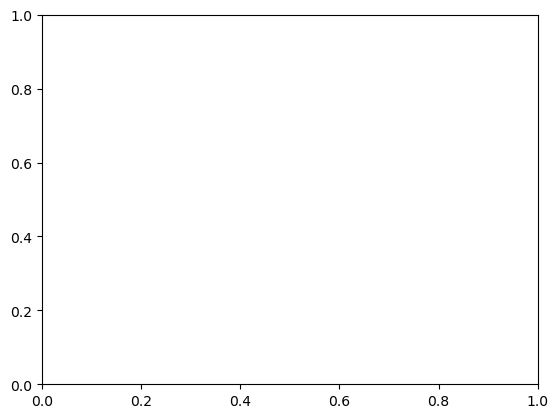

In [231]:
aX=plt.gca()

In [233]:
aX.plot(alphas, coefs)
 aX.set_Xscale('log')
 plt.Xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

IndentationError: unexpected indent (73277429.py, line 2)